# COMP 514 - Data Mining Project

* Group 1: Pablo Bornacin, Najmeh Najmi, A K M Shariful Islam Pathan, Mimi Schirm
* Project Assigment 3: Data Exploration

# California Pollution 2000 - 2016

The original dataset consists of the pollution dataset for the United States from 2000 to 2016. As discussed in our previous presentation, we have decided to narrow our analysis and focus only on the state of California during this time.
<br><br>The dataset consists of data from four major air pollutants including: Nitrogen Dioxide (NO2), Ozone (O3), Sulphur Dioxide (SO2), and Carbon Monoxide (CO). The dataset we have acquired has provided the mean, max, and AQI value for each of the four pollutants mentioned for the state of California, from 2000 to 2016.
The data we have acquired provides **576,142 tuples/rows** and **25 attributes/columns** of data in the dataset.

### The Air Quality Index (AQI)

The Air Quality Index (AQI) is an index for reporting air quality and determines how polluted the quality of air is. The Environment Protection Agency (EPA) calculates the API and has established the national air quality standard to protect the public health. 
<br>The values to the left show a range of values that determines the quality of the air and its associated levels of health concern.
* AQI value of 0 - 50 is Good
* AQI value of 51 - 100 is Moderate
* AQI value of 101 - 150 is Unhealthy for sensitive groups
* AQI value of 151 - 200 is Unhealthy
* AQI value of 201 - 300 is Very Unhealthy
* AQI value of 301 - 500 is Hazardous

According to data.info(), there are null values in two columns: **SO2 AQI** and **CO AQI**

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib import dates as mdates
import copy

%matplotlib inline

In [260]:
data = pd.read_csv("pollution_us_2000_2016.csv/pollution_california_2000_2016.csv")
#Here is the first five rows of the dataset using the head function
data.head()

,id,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,3516,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.636364,2.0,9,3.0,0.556522,1.3,4,NaN
1,3517,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.636364,2.0,9,3.0,0.572222,0.8,6,9.0
2,3518,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.600000,2.0,11,NaN,0.556522,1.3,4,NaN
3,3519,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.600000,2.0,11,NaN,0.572222,0.8,6,9.0
4,3520,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/2/2000,16.043478,...,9,27,1.000000,2.0,5,3.0,0.578261,1.1,21,NaN


In [78]:
#Using shape we can see the number of tuples and attributes in our dataset
data.shape

(576142, 25)

In [79]:
#Info function gives us the datatype for each attribute as well as the number of the null values for that attribute 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576142 entries, 0 to 576141
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 576142 non-null  int64  
 1   State Code         576142 non-null  int64  
 2   County Code        576142 non-null  int64  
 3   Site Num           576142 non-null  int64  
 4   Address            576142 non-null  object 
 5   State              576142 non-null  object 
 6   County             576142 non-null  object 
 7   City               576142 non-null  object 
 8   Date Local         576142 non-null  object 
 9   NO2 Mean           576142 non-null  float64
 10  NO2 1st Max Value  576142 non-null  float64
 11  NO2 1st Max Hour   576142 non-null  int64  
 12  NO2 AQI            576142 non-null  int64  
 13  O3 Mean            576142 non-null  float64
 14  O3 1st Max Value   576142 non-null  float64
 15  O3 1st Max Hour    576142 non-null  int64  
 16  O3

### Basic Statistical Description of the Dataset

The first four columns of data.describe() are removed (including the statistics for 'id', 'State Code', 'County Code', 'Site Num') for better readibility of the data.
<br><br>Based on the table below, the range of the AQI values vary from *Good (0<AQI<50)* to *Very Unhealthy (201<AQI<300)* . 
<br><br>The table below shows that the mean and std for **SO2 AQI** and **CO AQI** are lower than **NO2 AQI** and **O3 AQI**. The data is less dispersed for **SO2 AQI** and **CO AQI**. 
Overall, the quality of air in the state of California from 2000 - 2016 has been reported to be in “good” standing as it shows an API < 50. 

In [5]:
from pandas import set_option
set_option('precision', 4)
df = data.describe()
df.iloc[:, 4:]

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,576142.0000,288232.0000,576142.0000,576142.0000,576142.0000,288060.0000
mean,13.6519,25.5921,11.2644,24.1102,0.0261,0.0388,10.2045,35.7227,1.1467,2.3318,8.5087,3.5983,0.4475,0.7693,7.4309,7.4057
std,11.0819,18.0266,7.3783,17.1299,0.0115,0.0150,3.7114,20.4324,1.4063,3.1973,6.3228,5.1959,0.3759,0.7986,7.2335,7.1838
min,-1.8714,-1.6000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.5217,-1.3000,0.0000,0.0000,-0.4000,-0.4000,0.0000,0.0000
25%,5.1818,11.0000,6.0000,10.0000,0.0177,0.0290,9.0000,25.0000,0.1571,0.6000,2.0000,1.0000,0.2208,0.3000,0.0000,3.0000
50%,10.9440,23.0000,9.0000,22.0000,0.0260,0.0380,10.0000,32.0000,0.7600,1.3000,8.0000,3.0000,0.3435,0.5000,6.0000,6.0000
75%,19.5455,37.0000,19.0000,35.0000,0.0340,0.0470,11.0000,40.0000,1.5565,3.0000,12.0000,4.0000,0.5522,1.0000,10.0000,9.0000
max,98.1304,262.0000,23.0000,131.0000,0.0862,0.1400,23.0000,218.0000,40.2714,192.0000,23.0000,153.0000,7.5083,19.9000,23.0000,201.0000


Given the size of our dataset, which is over 500k tuples, it is shown that there are several outliers within our data. Although there are outliers in our dataset, it is a very small number, therefore it doesn’t impact our analysis. After reviewing  the outliers, it seems to be within acceptable ranges.

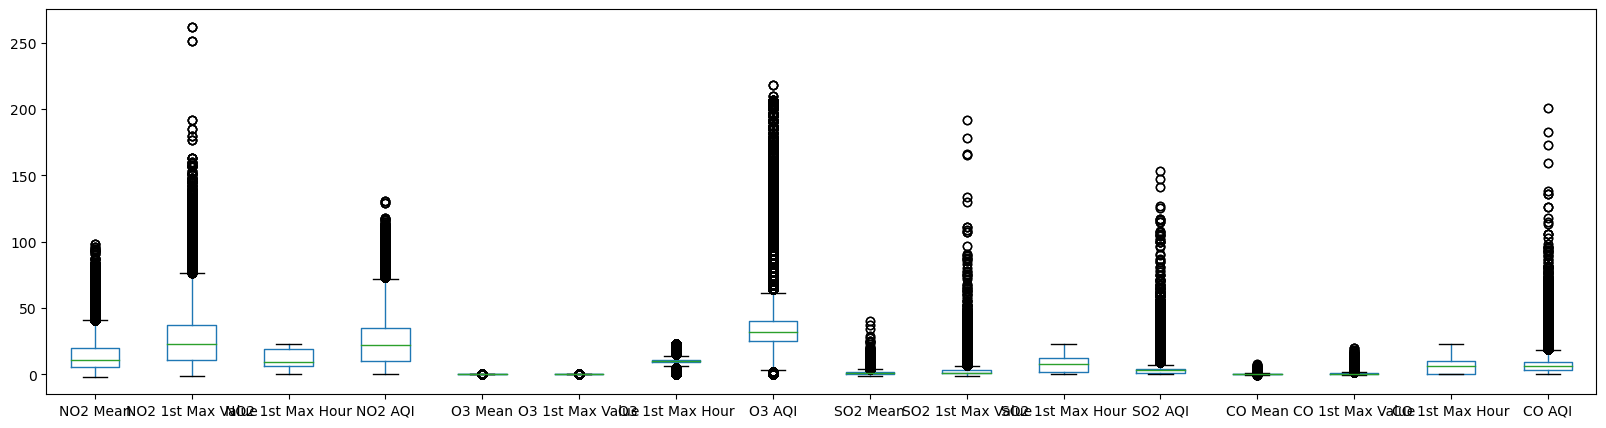

In [261]:
#Box Plots
boxplot_data = copy.deepcopy(data)

del boxplot_data["id"]
del boxplot_data["State Code"]
del boxplot_data["County Code"]
del boxplot_data["Site Num"]
del boxplot_data["Address"]
del boxplot_data["State"]
del boxplot_data["County"]
del boxplot_data["City"]
del boxplot_data["Date Local"]

plt.rcParams.update(plt.rcParamsDefault)
boxplot_data.plot(x=boxplot_data.index.name, kind='box', figsize=(20,5))


In [6]:
#Range of the attributes 
df.loc['range'] = df.loc['max'] - df.loc['min']
pd.DataFrame(df.loc['range'])

,range
id,45879.0000
State Code,0.0000
County Code,110.0000
Site Num,8000.0000
NO2 Mean,100.0019
NO2 1st Max Value,263.6000
NO2 1st Max Hour,23.0000
NO2 AQI,131.0000
O3 Mean,0.0862
O3 1st Max Value,0.1400


In [7]:
#Midrange of the attributes 
df.loc['midrange'] = (df.loc['max'] + df.loc['min']) / 2
pd.DataFrame(df.loc['midrange'])

,midrange
id,24579.5000
State Code,6.0000
County Code,56.0000
Site Num,4001.0000
NO2 Mean,48.1295
NO2 1st Max Value,130.2000
NO2 1st Max Hour,11.5000
NO2 AQI,65.5000
O3 Mean,0.0431
O3 1st Max Value,0.0700


In [8]:
#Median of the attributes(which is the middle number in the sorted tuples) 
df.loc['median'] = data.median()
pd.DataFrame(df.loc['median'])

,median
id,24450.0000
State Code,6.0000
County Code,65.0000
Site Num,1004.0000
NO2 Mean,10.9440
NO2 1st Max Value,23.0000
NO2 1st Max Hour,9.0000
NO2 AQI,22.0000
O3 Mean,0.0260
O3 1st Max Value,0.0380


Based on the mode of the attributes, most of the data is from Los Angeles, California.
<br>Mode of **AQI** for the four pollutants show that most of the times the air quality were *Good (0 < AQI < 50)*.

In [9]:
data.iloc[:,5:].mode()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,California,Los Angeles,Los Angeles,5/24/2011,0.0,1.0,6,8,0.03,0.039,10,31,0.0,1.0,8,1.0,0.2,0.3,0,3.0


In [10]:
#IQR of the attributes(which is the Interquartile Range) 
df.loc['IQR'] = df.loc['75%'] - df.loc['25%']
pd.DataFrame(df.loc['IQR'])

,IQR
id,18004.7500
State Code,0.0000
County Code,50.0000
Site Num,2001.0000
NO2 Mean,14.3636
NO2 1st Max Value,26.0000
NO2 1st Max Hour,13.0000
NO2 AQI,25.0000
O3 Mean,0.0163
O3 1st Max Value,0.0180


Majority of the attributes are positively skewed.  
We can see that the **1st Max Hour** for certain pollutants happened at specific times in the day: 
* The 1st max hour for SO2 is at 7:00 AM
* The 1st max hour for NO2 is at 7:00 AM
* The 1st max hour for CO is at 00:00 AM (which might be noise and we need to look furthur into it)
* The 1st max hour for O3 is at 9:00 AM

In [11]:
#Skew of the attributes(which is the measure of the asymmetry of the distribution) 
df.loc['skew'] = data.skew()
pd.DataFrame(df.loc['skew'])

,skew
id,-0.0023
State Code,0.0000
County Code,-0.2433
Site Num,1.7641
NO2 Mean,1.2664
NO2 1st Max Value,1.0530
NO2 1st Max Hour,0.1300
NO2 AQI,1.0288
O3 Mean,0.1792
O3 1st Max Value,0.6524


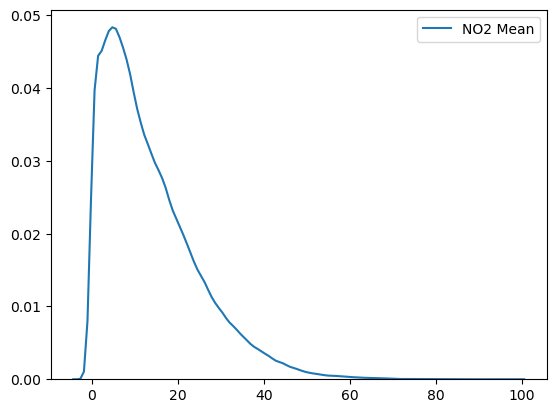

In [262]:
#NO2 Mean skewness
sns.kdeplot(data['NO2 Mean'])

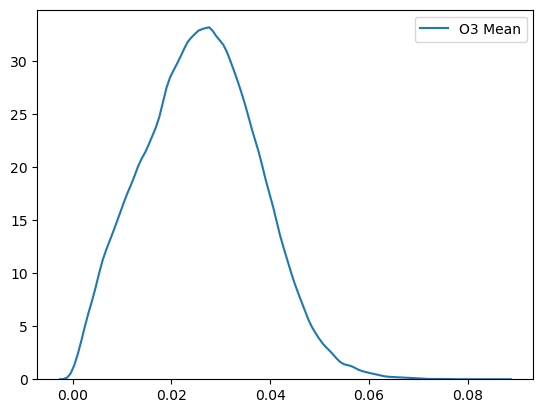

In [263]:
#O3 Mean skewness
sns.kdeplot(data['O3 Mean'])

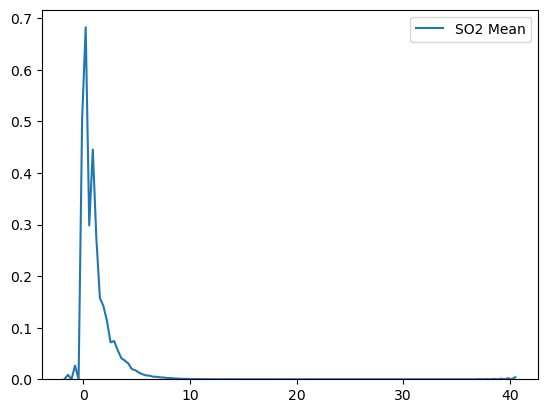

In [264]:
#SO2 Mean skewness
sns.kdeplot(data['SO2 Mean'])

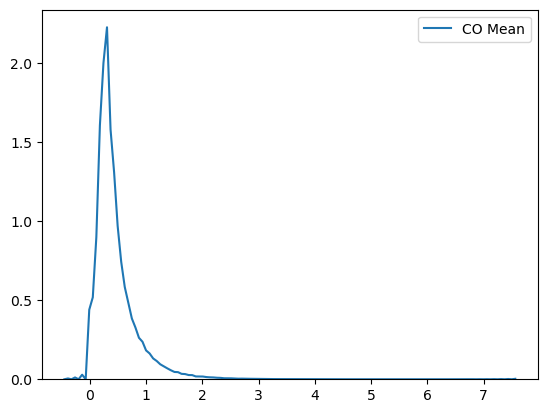

In [265]:
#CO Mean skewness
sns.kdeplot(data['CO Mean'])

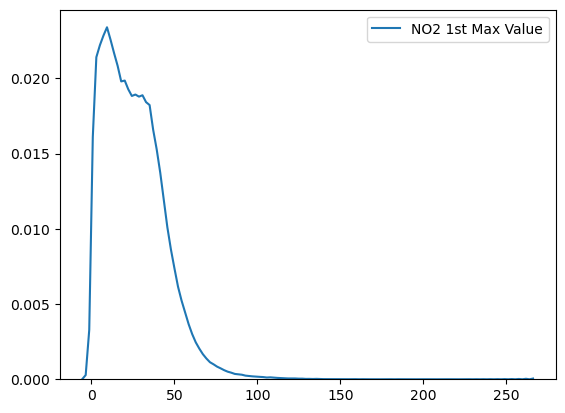

In [266]:
#NO2 1st Max Value skewness
sns.kdeplot(data['NO2 1st Max Value'])

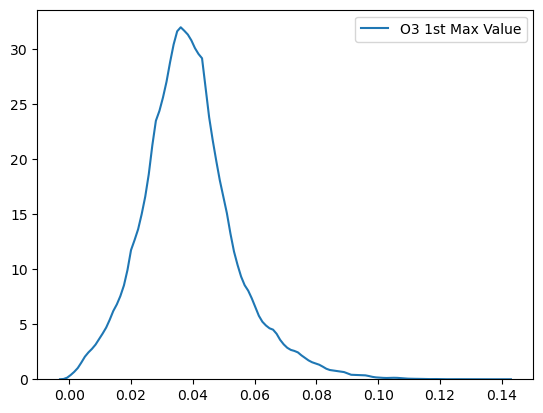

In [267]:
#O3 1st Max Value skewness
sns.kdeplot(data['O3 1st Max Value'])

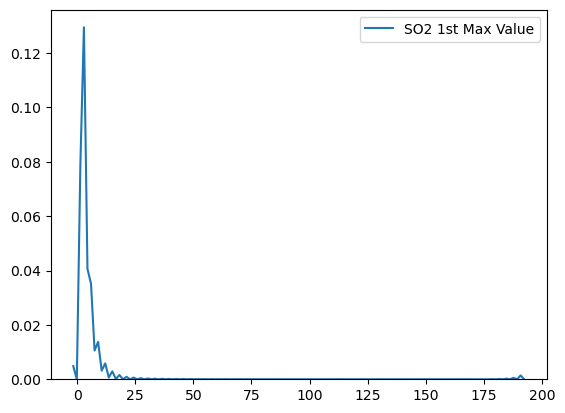

In [268]:
#SO2 1st Max Value skewness
sns.kdeplot(data['SO2 1st Max Value'])

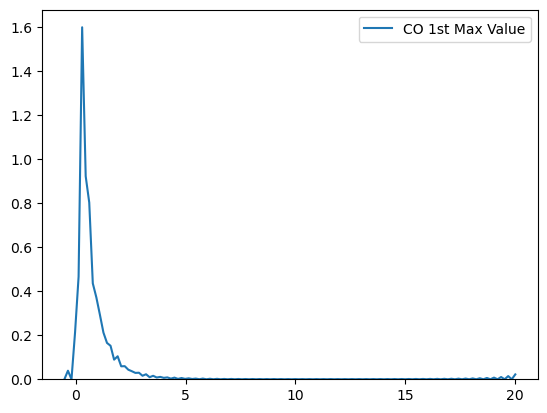

In [269]:
#CO 1st Max Value skewness
sns.kdeplot(data['CO 1st Max Value'])

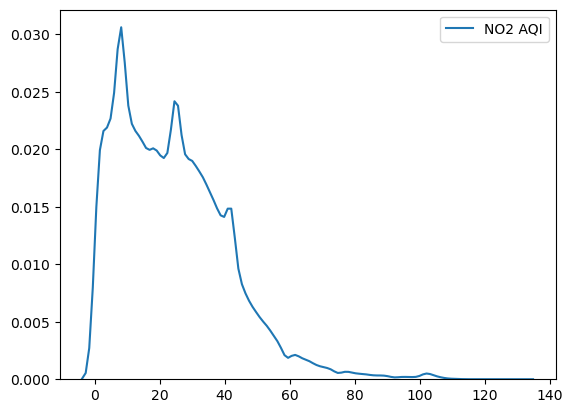

In [270]:
#NO2 AQI skewness
sns.kdeplot(data['NO2 AQI'])

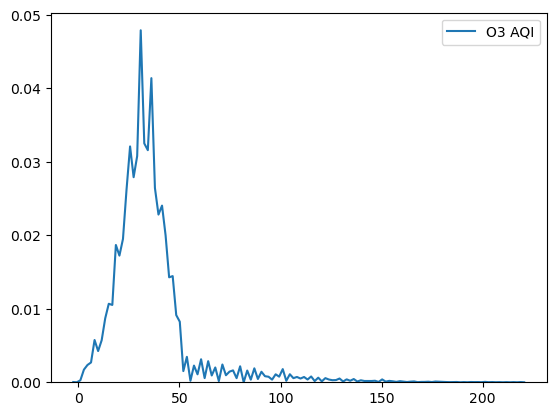

In [271]:
#O3 AQI skewness
sns.kdeplot(data['O3 AQI'])

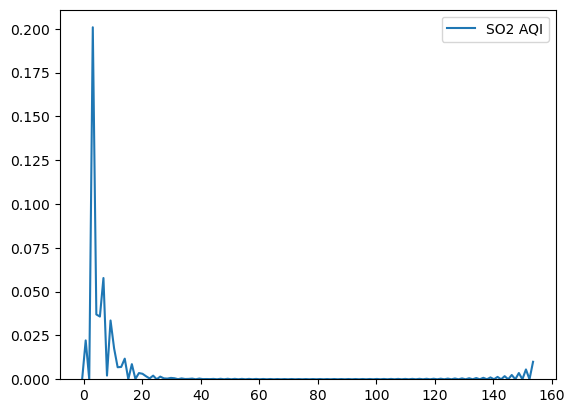

In [272]:
#SO2 AQI skewness
sns.kdeplot(data['SO2 AQI'])

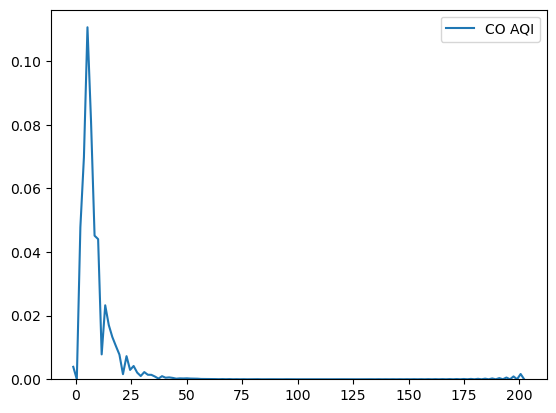

In [273]:
#CO AQI skewness
sns.kdeplot(data['CO AQI'])

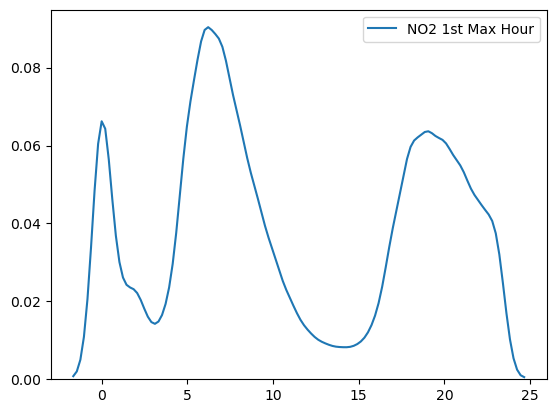

In [274]:
#NO2 1st Max Hour skewness
sns.kdeplot(data['NO2 1st Max Hour'])

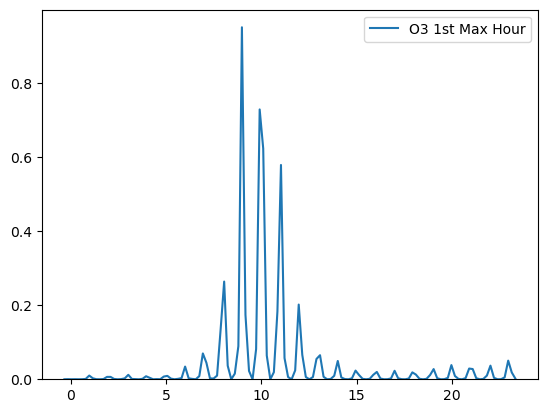

In [275]:
#O3 1st Max Hour skewness
sns.kdeplot(data['O3 1st Max Hour'])

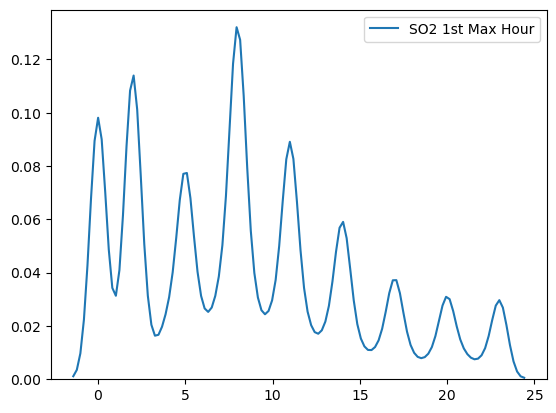

In [276]:
#SO2 1st Max Hour skewness
sns.kdeplot(data['SO2 1st Max Hour'])

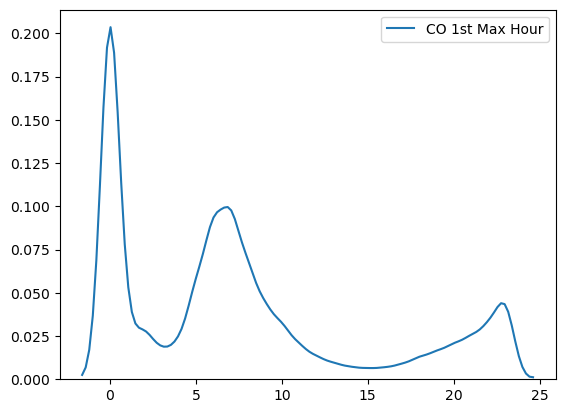

In [277]:
#CO 1st Max Hour skewness
sns.kdeplot(data['CO 1st Max Hour'])

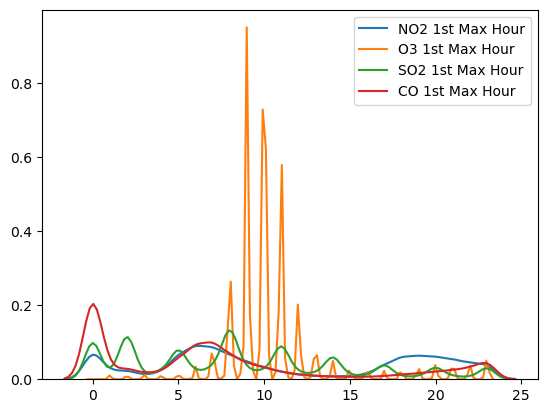

In [278]:
#1st Max Hour skewness on all contaminants
sns.kdeplot(data['NO2 1st Max Hour'])
sns.kdeplot(data['O3 1st Max Hour'])
sns.kdeplot(data['SO2 1st Max Hour'])
sns.kdeplot(data['CO 1st Max Hour'])

In [12]:
#Covariance measures the strength and the dicrection of relationship between the observations of two attributes
covariance = data.cov()
#covariance.iloc[4: , 4: ]
covariance.loc['NO2 Mean': , 'NO2 Mean':]

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,122.8090,185.1406,12.9256,176.1480,-0.0634,-0.0253,-0.1369,-14.9626,5.4210,11.5869,9.5777,19.0637,3.0327,5.9967,16.6835,56.6887
NO2 1st Max Value,185.1406,324.9582,21.1104,308.2862,-0.0801,-0.0075,-0.2460,12.3979,8.5008,18.9040,15.6278,31.0776,4.5429,9.5951,31.4979,88.7338
NO2 1st Max Hour,12.9256,21.1104,54.4389,19.8772,-0.0227,-0.0161,-3.3721,-19.3498,0.1266,0.1525,7.7506,0.0999,0.3520,0.7188,19.1827,5.9671
NO2 AQI,176.1480,308.2862,19.8772,293.4343,-0.0758,-0.0070,-0.2533,11.7490,8.1585,18.1354,14.6686,29.8779,4.3305,9.1412,29.8141,84.5327
O3 Mean,-0.0634,-0.0801,-0.0227,-0.0758,0.0001,0.0001,0.0020,0.1682,-0.0019,-0.0045,-0.0089,-0.0073,-0.0020,-0.0041,-0.0198,-0.0382
O3 1st Max Value,-0.0253,-0.0075,-0.0161,-0.0070,0.0001,0.0002,0.0029,0.2845,-0.0006,-0.0015,-0.0040,-0.0027,-0.0015,-0.0028,-0.0135,-0.0271
O3 1st Max Hour,-0.1369,-0.2460,-3.3721,-0.2533,0.0020,0.0029,13.7746,3.2536,-0.0026,0.1616,-0.6306,0.2794,-0.0279,-0.0668,-2.8438,-0.4060
O3 AQI,-14.9626,12.3979,-19.3498,11.7490,0.1682,0.2845,3.2536,417.4824,-0.4963,-1.7432,-2.3672,-3.4241,-1.4172,-2.6974,-14.4925,-25.7735
SO2 Mean,5.4210,8.5008,0.1266,8.1585,-0.0019,-0.0006,-0.0026,-0.4963,1.9778,3.6165,1.4423,5.8224,0.1827,0.3385,0.7240,3.1978
SO2 1st Max Value,11.5869,18.9040,0.1525,18.1354,-0.0045,-0.0015,0.1616,-1.7432,3.6165,10.2229,4.2069,18.9823,0.3639,0.7293,1.4553,6.6793


### Correlation Analysis

Below is the pearson correlation between the attributes as well as the heatmap to better visualize it.

In [13]:
correlations = data.corr(method = 'pearson')
correlations.loc['NO2 Mean': , 'NO2 Mean':]

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,1.0000,0.9268,0.1581,0.9279,-0.4964,-0.1518,-0.0033,-0.0661,0.3478,0.3270,0.1367,0.3310,0.7281,0.6776,0.2081,0.7120
NO2 1st Max Value,0.9268,1.0000,0.1587,0.9984,-0.3856,-0.0277,-0.0037,0.0337,0.3353,0.3280,0.1371,0.3318,0.6705,0.6665,0.2416,0.6852
NO2 1st Max Hour,0.1581,0.1587,1.0000,0.1573,-0.2669,-0.1454,-0.1231,-0.1284,0.0122,0.0065,0.1661,0.0026,0.1269,0.1220,0.3594,0.1126
NO2 AQI,0.9279,0.9984,0.1573,1.0000,-0.3839,-0.0271,-0.0040,0.0336,0.3387,0.3311,0.1354,0.3357,0.6726,0.6682,0.2406,0.6869
O3 Mean,-0.4964,-0.3856,-0.2669,-0.3839,1.0000,0.8307,0.0473,0.7139,-0.1194,-0.1228,-0.1219,-0.1211,-0.4624,-0.4412,-0.2373,-0.4607
O3 1st Max Value,-0.1518,-0.0277,-0.1454,-0.0271,0.8307,1.0000,0.0514,0.9266,-0.0262,-0.0322,-0.0423,-0.0342,-0.2646,-0.2339,-0.1241,-0.2508
O3 1st Max Hour,-0.0033,-0.0037,-0.1231,-0.0040,0.0473,0.0514,1.0000,0.0429,-0.0005,0.0136,-0.0269,0.0145,-0.0200,-0.0225,-0.1059,-0.0152
O3 AQI,-0.0661,0.0337,-0.1284,0.0336,0.7139,0.9266,0.0429,1.0000,-0.0173,-0.0267,-0.0183,-0.0323,-0.1845,-0.1653,-0.0981,-0.1756
SO2 Mean,0.3478,0.3353,0.0122,0.3387,-0.1194,-0.0262,-0.0005,-0.0173,1.0000,0.8043,0.1622,0.7986,0.3456,0.3014,0.0712,0.3164
SO2 1st Max Value,0.3270,0.3280,0.0065,0.3311,-0.1228,-0.0322,0.0136,-0.0267,0.8043,1.0000,0.2081,0.9899,0.3028,0.2856,0.0629,0.2908


Observing the data, we can conclude that:

* **AQI** has a high correlation with its **1st Max Value** (>0.9). 
* **AQI** and its **Mean** are also highly correlated(>0.7).
* **O3 Mean** is negatively correlated with other pollutants **Mean**.
* **SO2, NO2 and CO Mean** are posisively correlated.

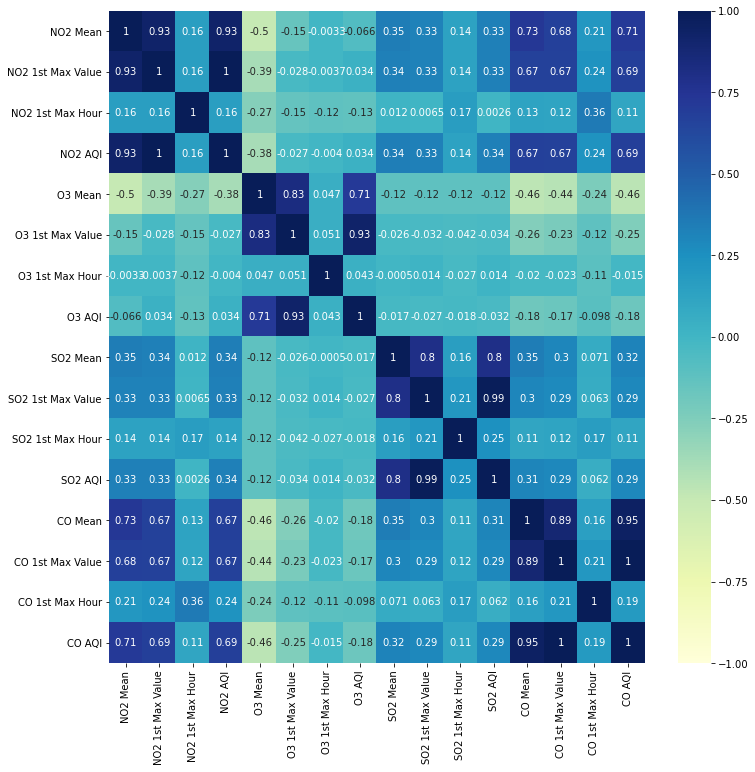

In [14]:
fig, ax = plt.subplots(figsize=(12,12))  
set_option('precision', 2)
sns.heatmap(correlations.loc['NO2 Mean': , 'NO2 Mean':], vmin = -1, vmax= 1, cmap = 'YlGnBu', annot = True)

Based on the next two plots, we can see that the number of the records is not equal for all the counties or cities. For example, we have more records for Los Angeles county and city compare to others. 

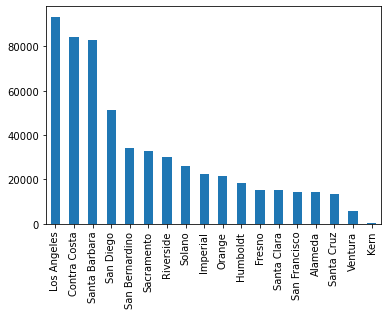

In [16]:
data['County'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

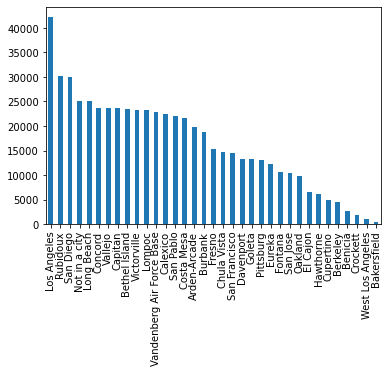

In [17]:
data['City'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

Here is the same plot, this time the matplotlib plot function is used. There is more flexibility in the way that you can plot data using matplotlib functions.

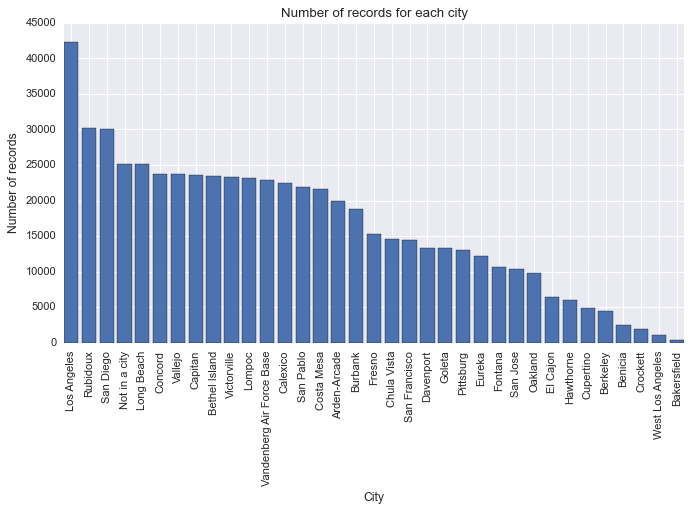

In [186]:
cityRecords = pd.DataFrame(data['City'].value_counts().sort_values(ascending = False))
cityRecords.reset_index(inplace=True)
cityRecords.iloc[:, 0]
plt.figure(figsize=(10, 5))
plt.bar(cityRecords.iloc[:, 0], cityRecords.iloc[:, 1])
plt.title("Number of records for each city")
plt.xlabel("City")
plt.ylabel("Number of records")
plt.xticks(rotation=90)
#plt.style.available
plt.style.use('fivethirtyeight')
plt.savefig('test.png')
plt.show()

In the graph below, the number of records for each year is plotted. 
<br> The number of records for different years are relatively equal. However, there are years with more records/data compare to others.

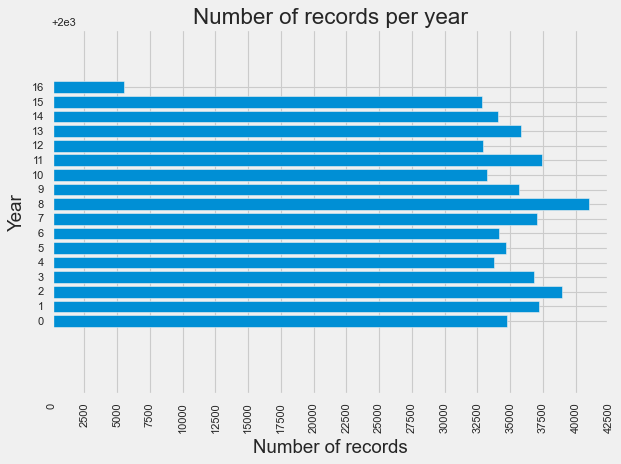

In [195]:
data['Date Local'] = pd.to_datetime(data['Date Local'],format='%m/%d/%Y')
dateRecords = data.groupby([data['Date Local'].dt.year], as_index=False).agg('count')
dateRecords.reset_index(inplace=True)
dateRecords.iloc[:, 0]
plt.barh(np.arange(2000,2017,1), dateRecords.iloc[:, 8])

plt.title("Number of records per year")
plt.ylabel("Year")
plt.xlabel("Number of records")

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2500))
plt.xticks(rotation = 90)
plt.yticks(np.arange(2000,2017))
plt.style.use('fivethirtyeight')
plt.savefig('test.png')
plt.show()

There are two different ways of calculating the mean value of the four pollutants **AQI** and **Mean** per month per year:

* In the first method, we group by the year and then month using the **Date Local** 
* In the second method, we split the **Date Local** to day, month, year columns and add them to the table and then group by the data using the new columns

This can help us to further analyze the data and get more insights about the pattern of the pollutants over time

In [175]:
#First Method
data.groupby([data['Date Local'].dt.year, data['Date Local'].dt.month]).mean().head(50)

#Second Method
data['day'] = data['Date Local'].dt.day
data['month'] = data['Date Local'].dt.month
data['year'] = data['Date Local'].dt.year
orderedByDate = data.groupby(['year', 'month']).mean()
orderedByDate[['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].head(25)

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
year month                                  
2000 1        36.08   18.77     6.06   18.77
     2        29.99   27.01     4.31   12.29
     3        30.73   35.22     5.77   10.28
     4        29.00   39.94     5.42    8.87
     5        25.26   43.55     6.41    6.88
     6        22.20   41.66     5.03    6.47
     7        21.47   38.62     5.40    5.52
     8        25.81   41.00     7.09    6.92
     9        30.26   36.55     6.53    8.53
     10       29.30   31.61     5.71    9.89
     11       38.34   22.23     7.00   18.47
     12       41.36   16.50     7.55   22.20
2001 1        37.98   20.77     6.61   18.23
     2        31.95   25.51     5.08   13.04
     3        30.47   34.48     6.21   10.20
     4        27.29   38.69     5.14    7.43
     5        27.81   48.88     6.63    7.27
     6        26.28   45.61     6.98    6.33
     7        21.31   38.53     6.09    5.51
     8        25.03   41.69     6.71    6.37
     9        30.63   37.68     7.40    8.32
     10       38.15   34.22     7.38   12.26
     11       36.60   23.80     6.15   15.83
     12       32.68   19.78     5.32   17.36
2002 1        34.39   19.59     5.81   16.75

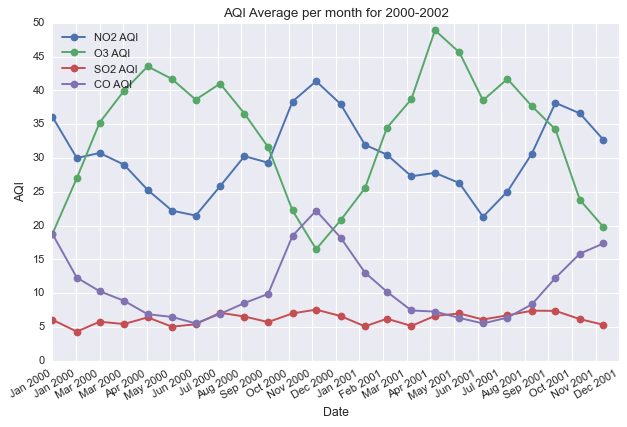

In [185]:
dates = [datetime(2000, 1, 1), datetime(2000, 2, 1), datetime(2000, 3, 1), datetime(2000, 4, 1), datetime(2000, 5, 1), datetime(2000, 6, 1),
       datetime(2000, 7, 1), datetime(2000, 8, 1), datetime(2000, 9, 1), datetime(2000, 10, 1), datetime(2000, 11, 1), datetime(2000, 12, 1),
         datetime(2001, 1, 1), datetime(2001, 2, 1), datetime(2001, 3, 1), datetime(2001, 4, 1), datetime(2001, 5, 1), datetime(2001, 6, 1),
       datetime(2001, 7, 1), datetime(2001, 8, 1), datetime(2001, 9, 1), datetime(2001, 10, 1), datetime(2001, 11, 1), datetime(2001, 12, 1)]

timeSeries = data[['Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
timeSeries = timeSeries.dropna(axis='rows')
timeSeries = timeSeries.groupby([timeSeries['Date Local'].dt.year, timeSeries['Date Local'].dt.month]).mean().head(24)

plt.style.use('seaborn')
#plt.figure(figsize=(10, 5))

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(24))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

date_format = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.plot_date(dates, timeSeries['NO2 AQI'], linestyle = 'solid', label = 'NO2 AQI')
plt.plot_date(dates, timeSeries['O3 AQI'], linestyle = 'solid', label = 'O3 AQI')
plt.plot_date(dates, timeSeries['SO2 AQI'], linestyle = 'solid', label = 'SO2 AQI')
plt.plot_date(dates, timeSeries['CO AQI'], linestyle = 'solid', label = 'CO AQI')


plt.xticks(rotation=90)
plt.gcf().autofmt_xdate()

plt.title("AQI Average per month for 2000-2002")
plt.xlabel("Date")
plt.ylabel("AQI")

plt.legend(loc = 'upper left')
plt.tight_layout()

plt.show()

The graph blow shows the mean value of AQI for each month of the year from 2000 to 2016. 
<br> The graph shows that there is a pattern in the average value of AQI over the years. This pattern can help us to better interpret the data and probably predict the AQI for future.

<Figure size 960x1600 with 0 Axes>

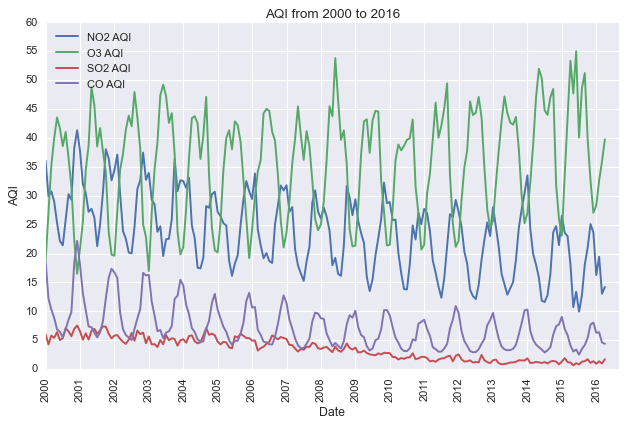

In [182]:
timeSeries = data[['Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
timeSeries = timeSeries.groupby(['Date Local'], as_index = False).mean()

plt.style.use('seaborn')

plt.figure(figsize = (12, 20))
timeSeries.groupby([timeSeries['Date Local'].dt.year, timeSeries['Date Local'].dt.month]).mean().plot()

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(np.arange(1999,2017)))
plt.xticks(rotation=90)


plt.title("AQI from 2000 to 2016")
plt.xlabel("Date")
plt.ylabel("AQI")

plt.legend(loc = 'upper left')
plt.tight_layout()